In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
%matplotlib inline
boston = datasets.load_boston()

In [3]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['HousePrice'] = boston.target

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,HousePrice
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
from sklearn.linear_model import LinearRegression

# Fitting the model
boston_model = LinearRegression()
boston_model.fit(boston.data, boston.target)

# Returning the R^2 for the model
boston_r2 = boston_model.score(boston.data, boston.target)
print('R^2: {0}'.format(boston_r2))

R^2: 0.7406426641094095


In [5]:
def calculate_residuals(model, features, label):
    """
    Creates predictions on the features with the model and calculates residuals
    """
    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    
    return df_results

In [8]:
def normal_errors_assumption(model, features, label, p_value_thresh=0.05):
    """
    Normality: Assumes that the error terms are normally distributed. If they are not,
    nonlinear transformations of variables may solve this.
               
    This assumption being violated primarily causes issues with the confidence intervals
    """
    from statsmodels.stats.diagnostic import normal_ad
    print('Assumption 1: The error terms are normally distributed', '\n')
    
    # Calculating residuals for the Anderson-Darling test
    df_results = calculate_residuals(model, features, label)
    
    print('Using the Anderson-Darling test for normal distribution')

    # Performing the test on the residuals
    p_value = normal_ad(df_results['Residuals'])[1]
    print('p-value from the test - below 0.05 generally means non-normal:', p_value)
    
    # Reporting the normality of the residuals
    if p_value < p_value_thresh:
        print('Residuals are not normally distributed')
    else:
        print('Residuals are normally distributed')
    
    # Plotting the residuals distribution
    plt.subplots(figsize=(12, 6))
    plt.title('Distribution of Residuals')
    sns.distplot(df_results['Residuals'])
    plt.show()
    
    print()
    if p_value > p_value_thresh:
        print('Assumption satisfied')
    else:
        print('Assumption not satisfied')
        print()
        print('Confidence intervals will likely be affected')
        print('Try performing nonlinear transformations on variables')
        
        

Assumption 1: The error terms are normally distributed 

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 8.311128328200776e-25
Residuals are not normally distributed


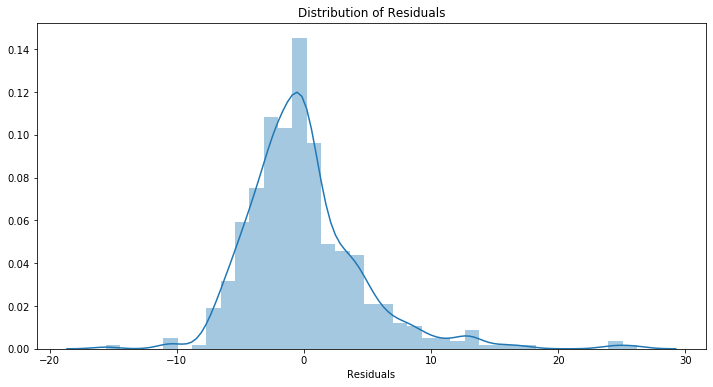


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables


In [9]:
normal_errors_assumption(boston_model, boston.data, boston.target)

In [12]:
def autocorrelation_assumption(model, features, label):
    """
    Autocorrelation: Assumes that there is no autocorrelation in the residuals. If there is
                     autocorrelation, then there is a pattern that is not explained due to
                     the current value being dependent on the previous value.
                     This may be resolved by adding a lag variable of either the dependent
                     variable or some of the predictors.
    """
    from statsmodels.stats.stattools import durbin_watson
    print('Assumption 2: No Autocorrelation', '\n')
    
    # Calculating residuals for the Durbin Watson-tests
    df_results = calculate_residuals(model, features, label)

    print('\nPerforming Durbin-Watson Test')
    print('Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data')
    print('0 to 2< is positive autocorrelation')
    print('>2 to 4 is negative autocorrelation')
    print('-------------------------------------')
    durbinWatson = durbin_watson(df_results['Residuals'])
    print('Durbin-Watson:', durbinWatson)
    if durbinWatson < 1.5:
        print('Signs of positive autocorrelation', '\n')
        print('Assumption not satisfied')
    elif durbinWatson > 2.5:
        print('Signs of negative autocorrelation', '\n')
        print('Assumption not satisfied')
    else:
        print('Little to no autocorrelation', '\n')
        print('Assumption satisfied')

In [13]:
autocorrelation_assumption(boston_model, boston.data, boston.target)

Assumption 2: No Autocorrelation 


Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 1.0715916506006815
Signs of positive autocorrelation 

Assumption not satisfied


In [16]:
def homoscedasticity_assumption(model, features, label):
    """
    Homoscedasticity: Assumes that the errors exhibit constant variance
    """
    print('Assumption 3: Homoscedasticity of Error Terms', '\n')
    
    print('Residuals should have relative constant variance')
        
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)

    # Plotting the residuals
    plt.subplots(figsize=(12, 6))
    ax = plt.subplot(111)  # To remove spines
    plt.scatter(x=df_results.index, y=df_results.Residuals, alpha=0.5)
    plt.plot(np.repeat(0, df_results.index.max()), color='darkorange', linestyle='--')
    ax.spines['right'].set_visible(False)  # Removing the right spine
    ax.spines['top'].set_visible(False)  # Removing the top spine
    plt.title('Residuals')
    plt.show() 

Assumption 3: Homoscedasticity of Error Terms 

Residuals should have relative constant variance


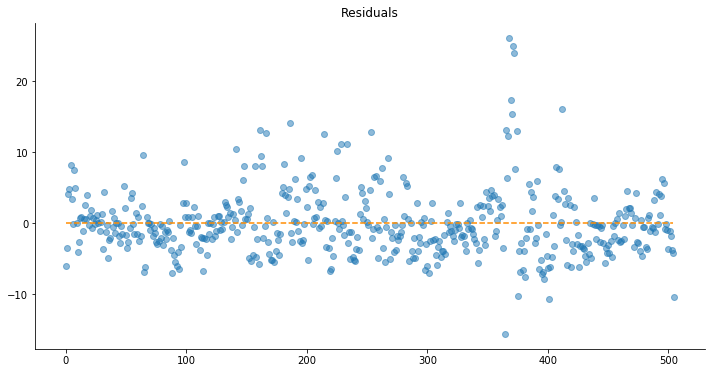

In [17]:
homoscedasticity_assumption(boston_model, boston.data, boston.target)

In [24]:
## Goldfeld Quandt Test

import statsmodels.stats.api as sms
from statsmodels.compat import lzip

# Checking heteroscedasticity : Using Goldfeld Quandt we test for heteroscedasticity.

# Null Hypothesis: Error terms are homoscedastic
# Alternative Hypothesis: Error terms are heteroscedastic.
    

# name = ['F statistic', 'p-value']
# test = sms.het_goldfeldquandt(residuals, predictors)
# lzip(name, test)

def heteroscedasticity_assumption(model, features, label):
    print('Assumption 3: Homoscedasticity of Error Terms', '\n')
    print('Residuals should have relative constant variance')
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)
    name = ['F statistic', 'p-value']
    test = sms.het_goldfeldquandt(df_results['Residuals'], features)
    test_results = lzip(name, test)
    return test_results[1]

heteroscedasticity_assumption(boston_model, boston.data, boston.target)

Assumption 3: Homoscedasticity of Error Terms 

Residuals should have relative constant variance


('p-value', 4.3115242837785714e-08)

In [26]:
def multicollinearity_assumption(model, features, label, feature_names=None):
    """
    Multicollinearity: Assumes that predictors are not correlated with each other. If there is
                       correlation among the predictors, then either remove prepdictors with high
                       Variance Inflation Factor (VIF) values or perform dimensionality reduction
                           
                       This assumption being violated causes issues with interpretability of the 
                       coefficients and the standard errors of the coefficients.
    """
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    print('Assumption 4: Little to no multicollinearity among predictors')
        
    # Plotting the heatmap
    plt.figure(figsize = (10,8))
    sns.heatmap(pd.DataFrame(features, columns=feature_names).corr(), annot=True)
    plt.title('Correlation of Variables')
    plt.show()
        
    print('Variance Inflation Factors (VIF)')
    print('> 10: An indication that multicollinearity may be present')
    print('> 100: Certain multicollinearity among the variables')
    print('-------------------------------------')
       
    # Gathering the VIF for each variable
    VIF = [variance_inflation_factor(features, i) for i in range(features.shape[1])]
    for idx, vif in enumerate(VIF):
        print('{0}: {1}'.format(feature_names[idx], vif))
        
    # Gathering and printing total cases of possible or definite multicollinearity
    possible_multicollinearity = sum([1 for vif in VIF if vif > 10])
    definite_multicollinearity = sum([1 for vif in VIF if vif > 100])
    print()
    print('{0} cases of possible multicollinearity'.format(possible_multicollinearity))
    print('{0} cases of definite multicollinearity'.format(definite_multicollinearity))
    print()

    if definite_multicollinearity == 0:
        if possible_multicollinearity == 0:
            print('Assumption satisfied')
        else:
            print('Assumption possibly satisfied')
            print()
            print('Coefficient interpretability may be problematic')
            print('Consider removing variables with a high Variance Inflation Factor (VIF)')

    else:
        print('Assumption not satisfied')
        print()
        print('Coefficient interpretability will be problematic')
        print('Consider removing variables with a high Variance Inflation Factor (VIF)')

Assumption 4: Little to no multicollinearity among predictors


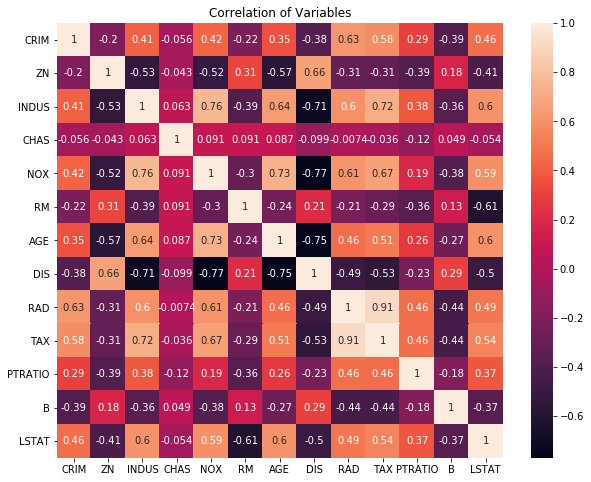

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------
CRIM: 2.1003728199615233
ZN: 2.8440132669462646
INDUS: 14.485757706539331
CHAS: 1.1529518589418777
NOX: 73.89494652814788
RM: 77.94828304638538
AGE: 21.38685048994314
DIS: 14.6996523837492
RAD: 15.167724857920897
TAX: 61.227274009649456
PTRATIO: 85.02954731061801
B: 20.10494263622909
LSTAT: 11.102024772203539

10 cases of possible multicollinearity
0 cases of definite multicollinearity

Assumption possibly satisfied

Coefficient interpretability may be problematic
Consider removing variables with a high Variance Inflation Factor (VIF)


In [27]:
multicollinearity_assumption(boston_model, boston.data, boston.target, boston.feature_names)

In [1]:
# import libraries for data manipulation
import pandas as pd
import numpy as np

# import libraries for data visualization
# !pip install -U seaborn --user
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import ProbPlot

# import libraries for building linear regression model
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# import library for preparing data
from sklearn.model_selection import train_test_split
from sklearn import datasets

# import library for data preprocessing
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

In [2]:
boston = datasets.load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['HousePrice'] = boston.target

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,HousePrice
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CRIM        506 non-null    float64
 1   ZN          506 non-null    float64
 2   INDUS       506 non-null    float64
 3   CHAS        506 non-null    float64
 4   NOX         506 non-null    float64
 5   RM          506 non-null    float64
 6   AGE         506 non-null    float64
 7   DIS         506 non-null    float64
 8   RAD         506 non-null    float64
 9   TAX         506 non-null    float64
 10  PTRATIO     506 non-null    float64
 11  B           506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  HousePrice  506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


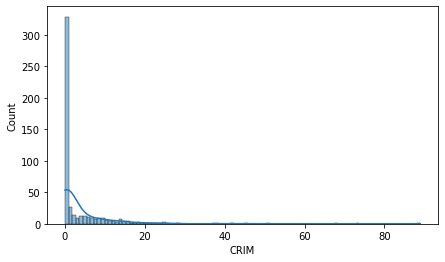

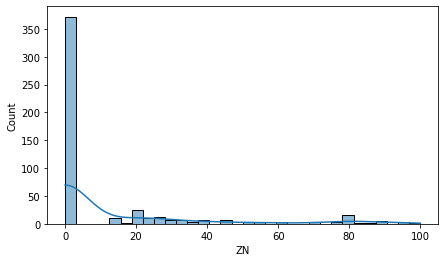

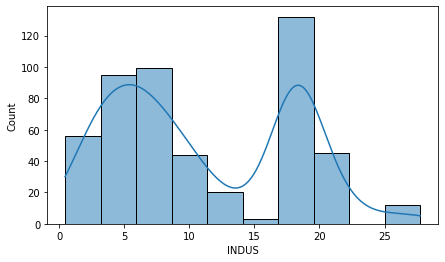

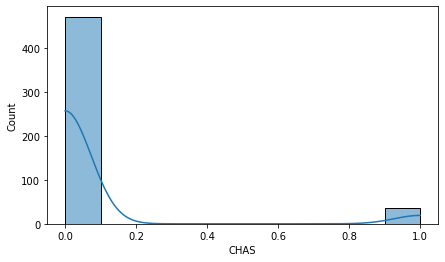

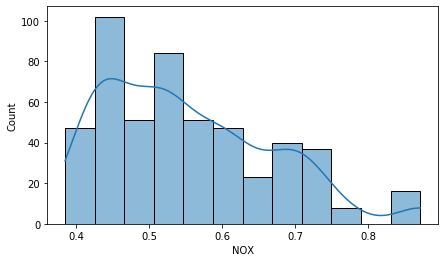

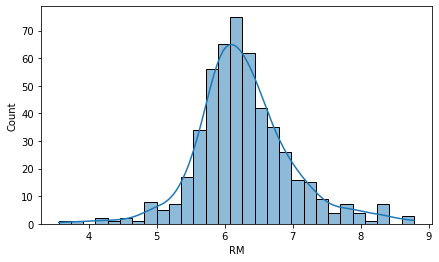

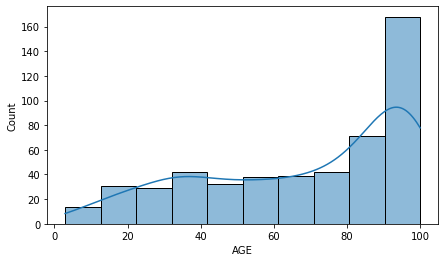

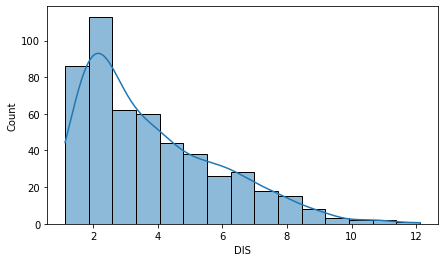

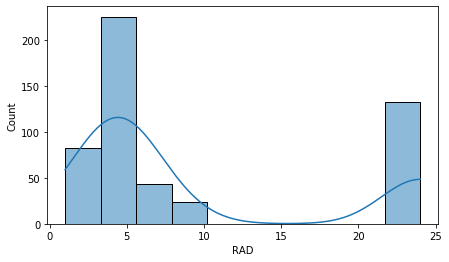

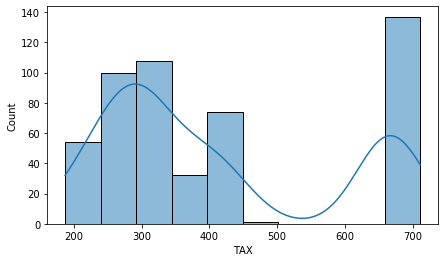

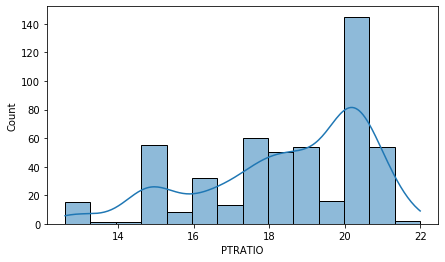

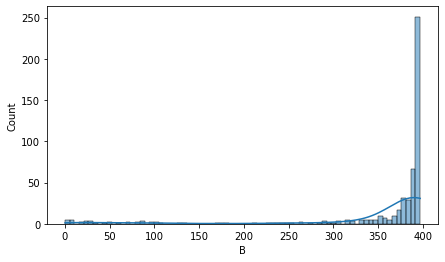

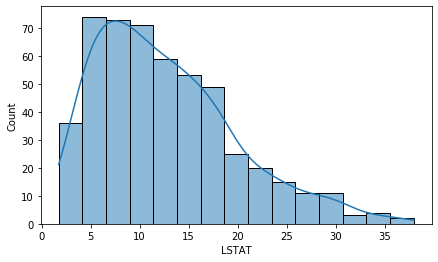

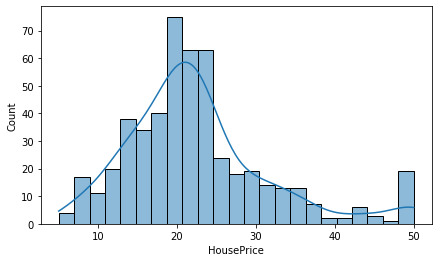

In [5]:
## Univariate Analysis


# let's plot all the columns to look at their distributions
for i in df.columns:
    plt.figure(figsize=(7, 4))
    sns.histplot(data=df, x=i, kde = True)
    plt.show()

In [7]:
print(df['HousePrice'].astype(float).skew())

1.1080984082549072


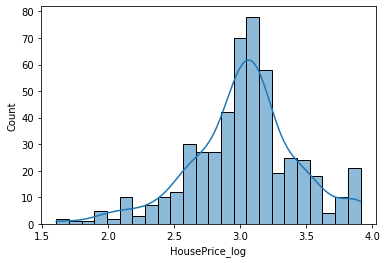

In [8]:
##As the dependent variable is sightly skewed, we will apply a log transformation on the 'HousePrice' column and 
# check the distribution of the transformed column.

df['HousePrice_log'] = np.log(df['HousePrice'])

sns.histplot(data=df, x='HousePrice_log', kde = True)

In [9]:
df['HousePrice_log'].skew()

-0.33032129530987864

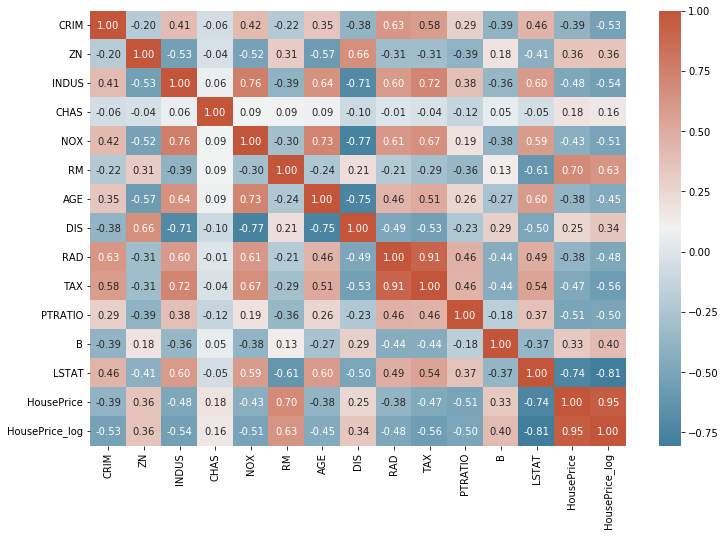

In [9]:
## Bivariate Analysis

plt.figure(figsize=(12,8))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap=cmap ) 
plt.show()

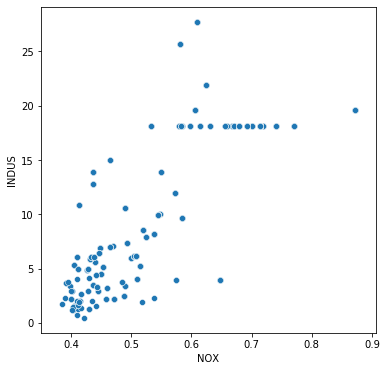

In [10]:
## Visualizing the relationship between the features having significant correlations (> 0.7)

# scatterplot to visualize the relationship between NOX and INDUS
plt.figure(figsize=(6, 6))
sns.scatterplot(x=df['NOX'], y=df['INDUS'], data=df)
plt.show()

Observations:__ It appears that there is no pattern in this correlation between the two features.

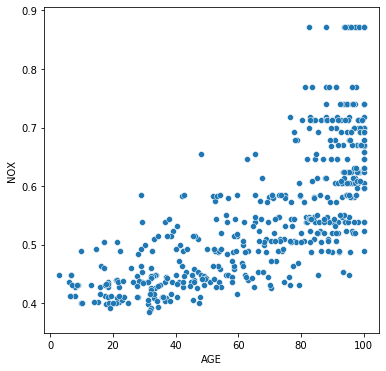

In [11]:
# scatterplot to visualize the relationship between AGE and NOX
plt.figure(figsize=(6, 6))
sns.scatterplot(x=df['AGE'], y=df['NOX'], data=df)

plt.show()

Observations:__

old owner-occupied houses are located in a geographical location closer to the oxide source than 
more recently-built houses.

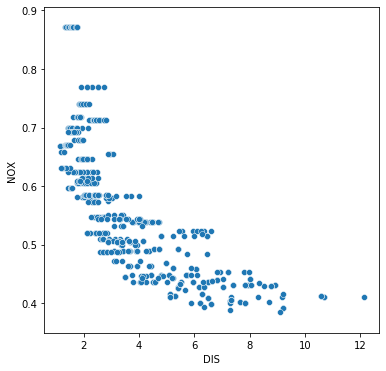

In [12]:
# scatterplot to visualize the relationship between DIS and NOX
plt.figure(figsize=(6, 6))
sns.scatterplot(y=df['NOX'], x=df['DIS'], data=df)

plt.show()

Observations:___

The distant the house is from employeement centers, the less oxide concentration is there. 
This implies that empolyeement centers location is where the oxid source lies

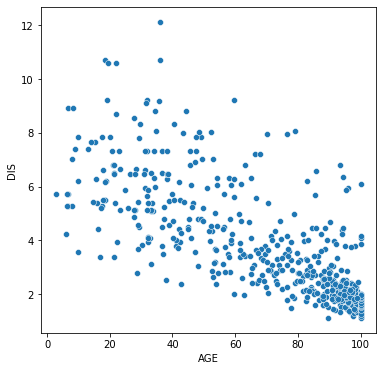

In [13]:
# scatterplot to visualize the relationship between AGE and DIS
plt.figure(figsize=(6, 6))
sns.scatterplot(x = 'AGE', y = 'DIS', data = df)
plt.show()

The distance of the houses to the Boston employment centers appears to decrease moderately as the the proportion of 
the old houses increase in the town. It is possible that the Boston employment centers are located in the established 
towns where proportion of owner-occupied units built prior to 1940 is comparatively high.

This, along with the previous observations, support the assumption that old owner-occupied houses are closer to 
employeement centers and employeement centers are emitting oxides.

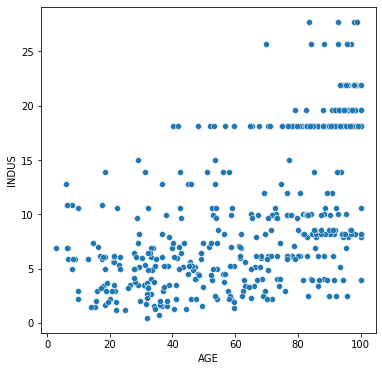

In [14]:
# scatterplot to visualize the relationship between AGE and INDUS
plt.figure(figsize=(6, 6))
sns.scatterplot(x = 'AGE', y = 'INDUS', data = df)
plt.show()

In [ ]:
No trend between the two variables is visible in the above plot.

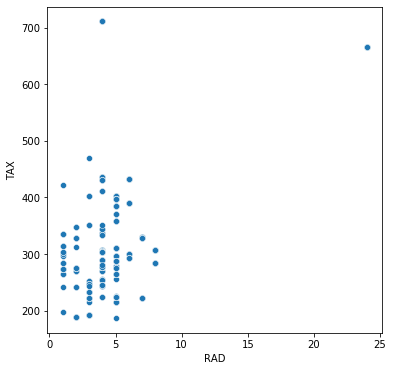

In [15]:
# scatterplot to visulaize the relationship between RAD and TAX
plt.figure(figsize=(6, 6))
sns.scatterplot(x = 'RAD', y = 'TAX', data = df)
plt.show()

The correlation between RAD and TAX is very high. But, no trend is visible between the two variables. 
This might be due to outliers.

In [16]:
# remove the data corresponding to high tax rate
df1 = df[df['TAX'] < 600]
# import the required function
from scipy.stats import pearsonr
# calculate the correlation
print('The correlation between TAX and RAD is', pearsonr(df1['TAX'], df1['RAD'])[0])

The correlation between TAX and RAD is 0.24975731331429196


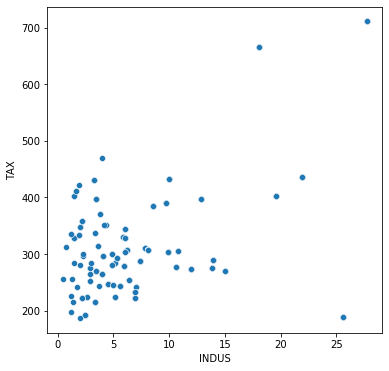

In [17]:
# scatterplot to visualize the relationship between INDUS and TAX
plt.figure(figsize=(6, 6))
sns.scatterplot(x = 'INDUS', y = 'TAX', data = df)
plt.show()

The tax rate appears to increase with an increase in the proportion of non-retail business acres per town. 
This might be due to the reason that the variables TAX and INDUS are related with a third variable.

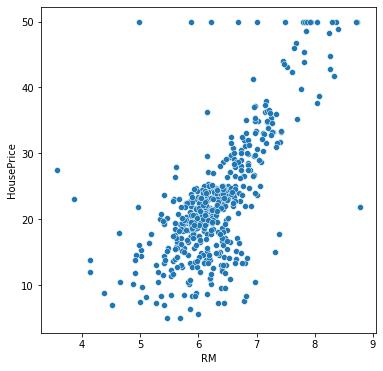

In [18]:
# scatterplot to visulaize the relationship between RM and MEDV
plt.figure(figsize=(6, 6))
sns.scatterplot(x = 'RM', y = 'HousePrice', data = df)
plt.show()

The price of the house seems to increase as the value of RM increases. This is expected as the price is 
generally higher for more rooms.

There are a few outliers in a horizotal line as the HousePrice value seems to be capped at 50.

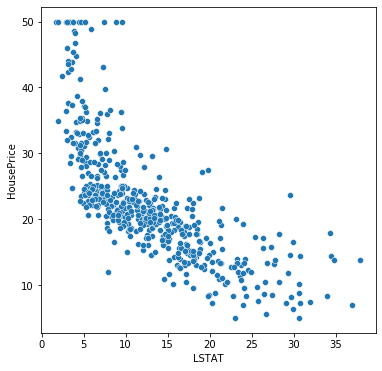

In [19]:
# scatterplot to visulaize the relationship between LSTAT and MEDV
plt.figure(figsize=(6, 6))
sns.scatterplot(x = 'LSTAT', y = 'HousePrice', data = df)
plt.show()

The price of the house tends to decrease with an increase in LSTAT. This is also possible as the house price is 
lower in areas where lower status people live.

There are few outliers and the data seems to be capped at 50.

We have seen that the variables LSTAT and RM have a linear relationship with the dependent variable HousePrice. 
Also, there are significant relationships among a few independent variables, which is not desirable for a linear 
regression model. Let's first split the dataset.

In [21]:
# separate the dependent and indepedent variable
Y = df['HousePrice_log']
X = df.drop(columns = {'HousePrice', 'HousePrice_log'})

# add the intercept term
X = sm.add_constant(X)

In [22]:
# splitting the data in 70:30 ratio of train to test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30 , random_state=1)

In [23]:
## Check for Multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

# function to check VIF
def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif


print(checking_vif(X_train))

    feature         VIF
0     const  585.099960
1      CRIM    1.993439
2        ZN    2.743911
3     INDUS    4.004462
4      CHAS    1.078490
5       NOX    4.430555
6        RM    1.879494
7       AGE    3.155351
8       DIS    4.361514
9       RAD    8.369185
10      TAX   10.194047
11  PTRATIO    1.948555
12        B    1.385213
13    LSTAT    2.926462


There are two variables with a high VIF - RAD and TAX. Let's remove TAX as it has the highest VIF values and 
check the multicollinearity again.

In [24]:
# create the model after dropping TAX
X_train = X_train.drop(['TAX'],1)

# check for VIF
print(checking_vif(X_train))

    feature         VIF
0     const  581.372515
1      CRIM    1.992236
2        ZN    2.483521
3     INDUS    3.277778
4      CHAS    1.052841
5       NOX    4.397232
6        RM    1.876243
7       AGE    3.154114
8       DIS    4.339453
9       RAD    2.978247
10  PTRATIO    1.914523
11        B    1.384927
12    LSTAT    2.924524


Now, we will create the linear regression model as the VIF is less than 5 for all the independent variables, and we can assume that multicollinearity has been removed between the variables.

In [25]:
# create the model
model1 = sm.OLS(y_train, X_train).fit()

# get the model summary
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         HousePrice_log   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     95.56
Date:                Fri, 24 Jun 2022   Prob (F-statistic):          2.97e-101
Time:                        18:35:13   Log-Likelihood:                 78.262
No. Observations:                 354   AIC:                            -130.5
Df Residuals:                     341   BIC:                            -80.22
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4999      0.253     17.767      0.000       4.002       4.998
CRIM          -0.0122      0.002     -7.005      0.000      -0.016      -0.009
ZN             0.0010      0.001      1.417      0.157      -0.000       0.002
INDUS         -0.0002      0.003     -0.066      0.947      -0.006       0.005
CHAS           0.1164      0.039      3.008      0.003       0.040       0.193
NOX           -1.0297      0.187     -5.509      0.000      -1.397      -0.662
RM             0.0569      0.021      2.734      0.007       0.016       0.098
AGE            0.0003      0.001      0.390      0.697      -0.001       0.002
DIS           -0.0496      0.010     -4.841      0.000      -0.070      -0.029
RAD            0.0080      0.002      3.885      0.000       0.004       0.012
PTRATIO       -0.0458      0.007     -6.762      0.000      -0.059      -0.033
B              0.0002      0.000      1.796      0.073   -2.35e-05       0.001
LSTAT         -0.0291      0.002    -11.772      0.000      -0.034      -0.024
==============================================================================
Omnibus:                       33.707   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              100.726
Skew:                           0.387   Prob(JB):                     1.34e-22
Kurtosis:                       5.496   Cond. No.                     1.01e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Observations:_

R square and adjusted R square values are large which gives a good level of confidence about the model.
Independent variables (ZN, AGE, and INDUS) have a high p-value and low t, which implies a minimum significance.

In [26]:
# create the model after dropping TAX
Y = df['HousePrice_log']

#write your code here
X = df.drop(columns = {'HousePrice', 'HousePrice_log', 'ZN', 'AGE', 'INDUS', 'TAX'}) 
X = sm.add_constant(X)

#splitting the data in 70:30 ratio of train to test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30 , random_state=1)

# create the model
model2 = sm.OLS(y_train, X_train).fit() 

# get the model summary
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         HousePrice_log   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     127.5
Date:                Fri, 24 Jun 2022   Prob (F-statistic):          6.21e-104
Time:                        18:36:53   Log-Likelihood:                 77.190
No. Observations:                 354   AIC:                            -134.4
Df Residuals:                     344   BIC:                            -95.69
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.5147      0.252     17.925      0.000       4.019       5.010
CRIM          -0.0119      0.002     -6.909      0.000      -0.015      -0.009
CHAS           0.1165      0.039      3.016      0.003       0.041       0.192
NOX           -1.0234      0.168     -6.086      0.000      -1.354      -0.693
RM             0.0622      0.020      3.089      0.002       0.023       0.102
DIS           -0.0434      0.008     -5.488      0.000      -0.059      -0.028
RAD            0.0083      0.002      4.092      0.000       0.004       0.012
PTRATIO       -0.0490      0.006     -7.936      0.000      -0.061      -0.037
B              0.0002      0.000      1.824      0.069   -1.95e-05       0.001
LSTAT         -0.0287      0.002    -12.577      0.000      -0.033      -0.024
==============================================================================
Omnibus:                       35.608   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.246
Skew:                           0.425   Prob(JB):                     2.31e-23
Kurtosis:                       5.519   Cond. No.                     9.76e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.76e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# We can see that the R-squared value has decreased by 0.002, since we have removed variables from the model, 
# whereas the adjusted R-squared as not, since we removed statistically insignificant variables only.

In [27]:
# Check for mean residuals

residuals = model2.resid
residuals.mean()

-4.679872308886041e-15

Observations:__ Mean of residuals is close to zero, which supports the linear regression assumption.

Check for homoscedasticity
Homoscedasticity - If the residuals are symmetrically distributed across the regression line, then the data is said to homoscedastic.

Heteroscedasticity- - If the residuals are not symmetrically distributed across the regression line, then the data is said to be heteroscedastic. In this case, the residuals can form a funnel shape or any other non-symmetrical shape.

We'll use Goldfeldquandt Test to test the following hypothesis with alpha = 0.05:

Null hypothesis: Residuals are homoscedastic
Alternate hypothesis: Residuals have heteroscedasticity

In [28]:
from statsmodels.stats.diagnostic import het_white
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

In [29]:
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(y_train, X_train)
lzip(name, test)

[('F statistic', 1.0844138711700857), ('p-value', 0.3005648212246462)]

Observations:__ P-value is greater than 0.05, so we fail to reject the null hypothesis. Meaning, the residuals have heteroscedasticity.

Linearity of variables
It states that the predictor variables must have a linear relation with the dependent variable.

To test the assumption, we'll plot residuals and fitted values on a plot and ensure that residuals do not form a strong pattern. They should be randomly and uniformly scattered on the x-axis.

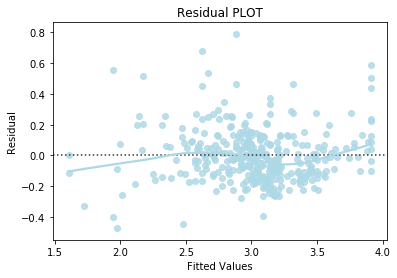

In [30]:
# predicted values
fitted = model2.fittedvalues

#sns.set_style("whitegrid")
sns.residplot(x = y_train, y = residuals , color="lightblue", lowess=True) 
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Residual PLOT")
plt.show()

Observatioins:_ We can see that residuals are randomly and uniformly scattered.

In [ ]:
Normality of error terms
The residuals should be normally distributed.

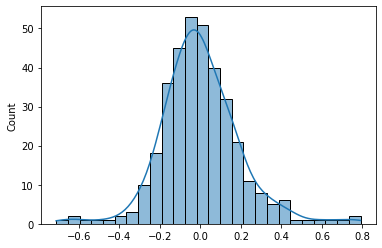

In [31]:
# Plot histogram of residuals
sns.histplot(residuals, kde=True)

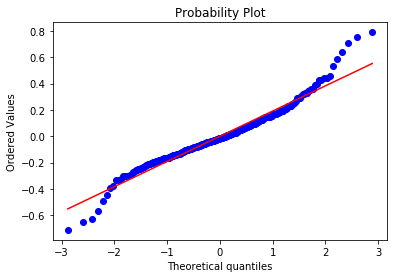

In [32]:
# Plot q-q plot of residuals
import pylab
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=pylab)
plt.show()

Observations:_ We can see normality of distribution.

In [33]:
## Multicoliearity
print(checking_vif(X_train))

   feature         VIF
0    const  576.483771
1     CRIM    1.959632
2     CHAS    1.051875
3      NOX    3.568988
4       RM    1.762632
5      DIS    2.587968
6      RAD    2.879223
7  PTRATIO    1.595111
8        B    1.379814
9    LSTAT    2.492461


In [34]:
## Check the performance of the model on the train and test data set

# RMSE
def rmse(predictions, targets):
    return np.sqrt(((targets - predictions) ** 2).mean())


# MAPE
def mape(predictions, targets):
    return np.mean(np.abs((targets - predictions)) / targets) * 100


# MAE
def mae(predictions, targets):
    return np.mean(np.abs((targets - predictions)))


# Model Performance on test and train data
def model_pref(olsmodel, x_train, x_test):

    # Insample Prediction
    y_pred_train = olsmodel.predict(x_train)
    y_observed_train = y_train

    # Prediction on test data
    y_pred_test = olsmodel.predict(x_test)
    y_observed_test = y_test

    print(
        pd.DataFrame(
            {
                "Data": ["Train", "Test"],
                "RMSE": [
                    rmse(y_pred_train, y_observed_train),
                    rmse(y_pred_test, y_observed_test),
                ],
                "MAE": [
                    mae(y_pred_train, y_observed_train),
                    mae(y_pred_test, y_observed_test),
                ],
                "MAPE": [
                    mape(y_pred_train, y_observed_train),
                    mape(y_pred_test, y_observed_test),
                ],
            }
        )
    )


# Checking model performance
model_pref(model2, X_train, X_test)

    Data      RMSE       MAE      MAPE
0  Train  0.194565  0.141729  4.919107
1   Test  0.191732  0.146199  5.069304


Observations:__

In general, the low errors above give a positive impression about the model's accuracy.<br>
We can see that the errors have increased slightly on the test data. This suggested further investigation to 
improve the performance on general data.

In [35]:
# Apply cross validation to improve the model and evaluate it using different evaluation metrics

# import the required function

from sklearn.model_selection import cross_val_score

# build the regression model and 
linearregression = LinearRegression()                                    

cv_Score11 = cross_val_score(linearregression, X_train, y_train, cv = 10)
cv_Score12 = cross_val_score(linearregression, X_train, y_train, cv = 10, scoring = 'neg_mean_squared_error')                                


print("RSquared: %0.3f (+/- %0.3f)" % (cv_Score11.mean(), cv_Score11.std() * 2))
print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1*cv_Score12.mean(), cv_Score12.std() * 2))

RSquared: 0.726 (+/- 0.251)
Mean Squared Error: 0.041 (+/- 0.024)


In [ ]:
The R-squared on the cross validation is 0.726, whereas on the training dataset it was 0.769
And the MSE on cross validation is 0.041, whereas on the training dataset it was 0.038

In [ ]:
We may want to reiterate the model building process again with new features or better feature engineering to increase the R-squared and decrease the MSE on cross validation.

In [36]:
coef = pd.Series(index = X_train.columns, data = model2.params.values)

coef_df = pd.DataFrame(data = {'Coefs': model2.params.values }, index =  X_train.columns)
coef_df

,Coefs
const,4.514720
CRIM,-0.011919
CHAS,0.116497
NOX,-1.023431
RM,0.062203
DIS,-0.043391
RAD,0.008288
PTRATIO,-0.049038
B,0.000249
LSTAT,-0.028659


In [37]:
# Let us write the equation of the fit
Equation = "log (Price) ="
print(Equation, end='\t')
for i in range(len(coef)):
    print('(', coef[i], ') * ', coef.index[i], '+', end = ' ')

log (Price) =	( 4.5147204835684205 ) *  const + ( -0.011918775173037797 ) *  CRIM + ( 0.11649715902151628 ) *  CHAS + ( -1.0234312247045159 ) *  NOX + ( 0.06220269133025641 ) *  RM + ( -0.043391138895610644 ) *  DIS + ( 0.008287691091705286 ) *  RAD + ( -0.04903790360575723 ) *  PTRATIO + ( 0.0002490051238005881 ) *  B + ( -0.02865873169444084 ) *  LSTAT + 

# Conclusions and business recommendations derived from the model
We started by exploring the data and performing EDA including univariate and bivariate analysis. <br>
We checked for Multicollinearity which is found between RAD and TAX, based on that TAX was droped.<br>
We analyzed and drop insignificant variables (ZN, AGE, and INDUS).<br>
Then we checked the linear regression assumptions which held true.<br>
Then built the model, checked its performance and applied cross validation and concluded results.<br>
At least 50% of Boston towns have no zoned lands for large lot and most of the houses are not on Charles riverside.<br>
Most of the old owner-occupied houses are located closer employeement center where oxide concentration is high.<br>
The house prices increase as the rooms increases.<br>
From the equation we can derive that, the prices go high for houses located near Charles river and housed with many rooms.<br>
The prices are negatively affected mostly by the oxide concentration which is mostly high in employeement centers. Crime rates and residents profile also negatively affects prices.